# Telecom Growth Explanatory Data Analysis - TellCo

## Import Libraries

In [1]:
import sys
import os
from dotenv import load_dotenv
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

## Import Functions

In [2]:
import sys
sys.path.append('../src')
pd.options.display.float_format = '{:.0f}'.format
from data.postgresql_files.db_config import(
                                     load_env_variables,
                                     db_connect
)
from shared.data_pipeline import(
                                        sql_to_dataframe,
                                        find_missing_values,
                                        handle_missing_values,
                                        handdle_outliers,
                                        save_dataset,
                                        load_dataset
                                    
)



from analysis.user_overview.analysis import(
                                            get_top_handsets,
                        					aggregate_user_behavior,
                                            analyze_basic_metrics,
                                            perform_bivariate_analysis,
                                            calculate_total_data_per_decile,
                                            perform_correlation_analysis                                            

)
from analysis.user_engagement.analysis import(
                        				aggregate_engagement_metrics,
                                        get_top_ten_customers,
                                        engagement_classification,
                                        compute_cluster_metrics,
                                        get_top_10_engaged_users,
                                        visualize_top_three_apps

)
from analysis.user_experience.analysis import(
                        				aggregate_customer_data,
                                        compute_top_bottom_frequent_values

)
from visualization.visualize_user_overview import(
                        			plot_duration_histogram,
                                    plot_variable_histograms

)


#from analysis.user_satisfaction.analysis import(
                        				

#)

## Load Environment Variables

In [ ]:
db_config = load_env_variables()
print("User:", db_config['user'])
print("Database:", db_config['database'])
print("...")

## Connect To PostgreSQL Database

In [ ]:
conn = db_connect(db_config)

## Query The Database

In [ ]:
query = """ SELECT * FROM public.xdr_data  """

## Load Data From PostgreSQL To Dataframe

In [ ]:
raw_xDR_df = sql_to_dataframe(conn, query)

## Desplay Fetched DataFrame

In [ ]:
display(raw_xDR_df)

## Save Converted DataFrame

In [ ]:
# Define output folder and file name
output_folder = os.path.join('..', 'src', 'shared', 'data')
filename = 'raw_xDR_df.csv'

output_path = save_dataset(raw_xDR_df, output_folder, filename)

# Task 1 - User Overview Analysis

## Load Raw Dataset

In [3]:
# path to the CSV file
filename = 'raw_xDR_df.csv'
path = os.path.join('..', 'src', 'shared', 'data', filename)
raw_dataset = load_dataset(path)

## Display Raw Dataset

In [4]:
display(raw_dataset)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,13114483482878900224,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,13114483484080500736,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,13114483485442799616,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,13114483499480700928,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,4/29/2019 7:28,451,4/30/2019 6:02,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
149997,7349883264234609664,4/29/2019 7:28,483,4/30/2019 10:41,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081,666648844
149998,13114483573367300096,4/29/2019 7:28,283,4/30/2019 10:46,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224,592786405
149999,13114483573367300096,4/29/2019 7:28,696,4/30/2019 10:40,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,8817106,8305402,3322253,13172589,352536971,2529475,814713113,1406930,29626096,371895920


## Check Missing Values

In [ ]:
missing_values = find_missing_values(raw_dataset) 
display(missing_values)

### Top 10 Handsets Used By The Customers

In [ ]:
top_10_handsets = get_top_handsets(raw_dataset)

display(top_10_handsets)

## Aggregate User Behaviour

In [5]:
df_user_behavior = aggregate_user_behavior(raw_dataset)
display(df_user_behavior)

,MSISDN/Number,Bearer_Id,Duration,Total_DL,Total_UL,SM_DL,SM_UL,Google_DL,Google_UL,Email_DL,Email_UL,YouTube_DL,YouTube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
0,33601001722,1,116720,842637466,36053108,2206504,25631,3337123,1051882,837400,493962,14900201,6724347,10265105,16915876,811091133,1367528,377096990,9473882
1,33601001754,1,181230,120755184,36104459,2598548,62017,4197697,1137166,2828821,478960,5324251,7107972,770569,10451194,105035298,14714780,279557701,2152370
2,33601002511,1,134969,556659663,39306820,3148004,47619,3343483,99643,2436500,768880,2137272,19196298,16525919,2827981,529068485,9759228,495086501,6607171
3,33601007832,1,49878,401993172,20327526,251469,28825,5937765,3740728,2178618,106052,4393123,2584198,1157362,784730,388074835,3051292,25248001,10031701
4,33601008617,2,18552,681565208,47140264,1430615,25656,6864334,2385474,1123904,528830,5169986,15596516,12485824,12115038,654490546,2908364,388821856,13580386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,33789996170,1,8810,687925212,26716429,234320,65863,6834178,697091,480946,525969,8294310,18353533,14754741,147797,657326717,3034642,291391283,3891534
106852,33789997247,1,140988,444575092,35732243,442214,56355,1472406,3957299,2513433,664,5596862,14254710,6929961,1601099,427620216,9383076,204636073,6479040
106853,3197020876596,1,877385,194828056,37295915,668596,46628,8572779,1865881,842279,678492,9839889,2120016,10340908,16251392,164563605,13485133,467678100,2848373
106854,337000037000919,1,253030,539634985,56652839,496337,25229,8215537,1615080,2989663,328919,16690728,20044212,9983678,20921364,501259042,8883653,144354057,4834382


## Save Aggregated Dataset

In [6]:
# Define output folder and file name
output_folder = os.path.join('..', 'src', 'analysis/user_overview', 'data')
filename = 'task_1_aggregated.csv'

output_path = save_dataset(df_user_behavior, output_folder, filename)

Dataset saved to ..\src\analysis/user_overview\data\task_1_aggregated.csv


## Load Task 1 Aggregated Data

In [7]:
# path to the CSV file
filename = 'task_1_aggregated.csv'
path = os.path.join('..', 'src', 'analysis/user_overview', 'data', filename)

# Load dataset
task_1_aggregated = load_dataset(path)

## Display Aggregated Dataset

In [8]:
display(task_1_aggregated)

,MSISDN/Number,Bearer_Id,Duration,Total_DL,Total_UL,SM_DL,SM_UL,Google_DL,Google_UL,Email_DL,Email_UL,YouTube_DL,YouTube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
0,33601001722,1,116720,842637466,36053108,2206504,25631,3337123,1051882,837400,493962,14900201,6724347,10265105,16915876,811091133,1367528,377096990,9473882
1,33601001754,1,181230,120755184,36104459,2598548,62017,4197697,1137166,2828821,478960,5324251,7107972,770569,10451194,105035298,14714780,279557701,2152370
2,33601002511,1,134969,556659663,39306820,3148004,47619,3343483,99643,2436500,768880,2137272,19196298,16525919,2827981,529068485,9759228,495086501,6607171
3,33601007832,1,49878,401993172,20327526,251469,28825,5937765,3740728,2178618,106052,4393123,2584198,1157362,784730,388074835,3051292,25248001,10031701
4,33601008617,2,18552,681565208,47140264,1430615,25656,6864334,2385474,1123904,528830,5169986,15596516,12485824,12115038,654490546,2908364,388821856,13580386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,33789996170,1,8810,687925212,26716429,234320,65863,6834178,697091,480946,525969,8294310,18353533,14754741,147797,657326717,3034642,291391283,3891534
106852,33789997247,1,140988,444575092,35732243,442214,56355,1472406,3957299,2513433,664,5596862,14254710,6929961,1601099,427620216,9383076,204636073,6479040
106853,3197020876596,1,877385,194828056,37295915,668596,46628,8572779,1865881,842279,678492,9839889,2120016,10340908,16251392,164563605,13485133,467678100,2848373
106854,337000037000919,1,253030,539634985,56652839,496337,25229,8215537,1615080,2989663,328919,16690728,20044212,9983678,20921364,501259042,8883653,144354057,4834382


## Check Missing Values

In [9]:
missing_values = find_missing_values(task_1_aggregated) 
display(missing_values)

MSISDN/Number    0
Bearer_Id        0
Duration         0
Total_DL         0
Total_UL         0
SM_DL            0
SM_UL            0
Google_DL        0
Google_UL        0
Email_DL         0
Email_UL         0
YouTube_DL       0
YouTube_UL       0
Netflix_DL       0
Netflix_UL       0
Gaming_DL        0
Gaming_UL        0
Other_DL         0
Other_UL         0
dtype: int64


MSISDN/Number    0
Bearer_Id        0
Duration         0
Total_DL         0
Total_UL         0
SM_DL            0
SM_UL            0
Google_DL        0
Google_UL        0
Email_DL         0
Email_UL         0
YouTube_DL       0
YouTube_UL       0
Netflix_DL       0
Netflix_UL       0
Gaming_DL        0
Gaming_UL        0
Other_DL         0
Other_UL         0
dtype: int64

## Handdle Missing Values If Found Above

In [10]:
task_1_aggregated_filled = handle_missing_values(task_1_aggregated)

## Display Cleaned Dataset

In [11]:
display(task_1_aggregated_filled)

,MSISDN/Number,Bearer_Id,Duration,Total_DL,Total_UL,SM_DL,SM_UL,Google_DL,Google_UL,Email_DL,Email_UL,YouTube_DL,YouTube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
0,33601001722,1,116720,842637466,36053108,2206504,25631,3337123,1051882,837400,493962,14900201,6724347,10265105,16915876,811091133,1367528,377096990,9473882
1,33601001754,1,181230,120755184,36104459,2598548,62017,4197697,1137166,2828821,478960,5324251,7107972,770569,10451194,105035298,14714780,279557701,2152370
2,33601002511,1,134969,556659663,39306820,3148004,47619,3343483,99643,2436500,768880,2137272,19196298,16525919,2827981,529068485,9759228,495086501,6607171
3,33601007832,1,49878,401993172,20327526,251469,28825,5937765,3740728,2178618,106052,4393123,2584198,1157362,784730,388074835,3051292,25248001,10031701
4,33601008617,2,18552,681565208,47140264,1430615,25656,6864334,2385474,1123904,528830,5169986,15596516,12485824,12115038,654490546,2908364,388821856,13580386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,33789996170,1,8810,687925212,26716429,234320,65863,6834178,697091,480946,525969,8294310,18353533,14754741,147797,657326717,3034642,291391283,3891534
106852,33789997247,1,140988,444575092,35732243,442214,56355,1472406,3957299,2513433,664,5596862,14254710,6929961,1601099,427620216,9383076,204636073,6479040
106853,3197020876596,1,877385,194828056,37295915,668596,46628,8572779,1865881,842279,678492,9839889,2120016,10340908,16251392,164563605,13485133,467678100,2848373
106854,337000037000919,1,253030,539634985,56652839,496337,25229,8215537,1615080,2989663,328919,16690728,20044212,9983678,20921364,501259042,8883653,144354057,4834382


## Analize Basic Metrics on User Behaviour

In [12]:
metrics = analyze_basic_metrics(task_1_aggregated_filled)
display(metrics)

,Bearer_Id,Duration,Total_DL,Total_UL,SM_DL,SM_UL,Google_DL,Google_UL,Email_DL,Email_UL,YouTube_DL,YouTube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
count,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856
mean,1,102695,455184477,41127097,1795947,32908,5750360,2055028,1792446,467059,11629307,11017120,11617520,10997794,422598897,8289507,421245976,8267681
std,1,72247,224790645,10386665,954210,17520,3043308,1095043,954200,248825,6182726,5849951,6194250,5854129,224620486,4408970,224157891,4392223
min,0,7142,8827082,2866892,12,0,207,3,97,14,53,106,42,35,2516,59,3290,156
25%,1,56410,276264920,34197060,1038284,19010,3346133,1185268,1036754,269604,6720295,6361144,6668676,6353316,243369920,4771741,243286828,4777439
50%,1,86400,456245462,41127015,1792984,32854,5740054,2054326,1792060,465892,11626465,11021903,11634538,10996365,423586168,8306379,421119218,8273797
75%,2,133912,633812078,48080206,2553164,46832,8181011,2923567,2551709,664105,16530491,15681806,16536794,15642394,601067887,11798529,599833498,11741376
max,18,1573420,902969616,78331311,3586007,65870,11462752,4121343,3586146,936418,23259098,22011962,23258336,22011955,843433310,16558794,843420874,16558816


## Visualize Basic Metrics

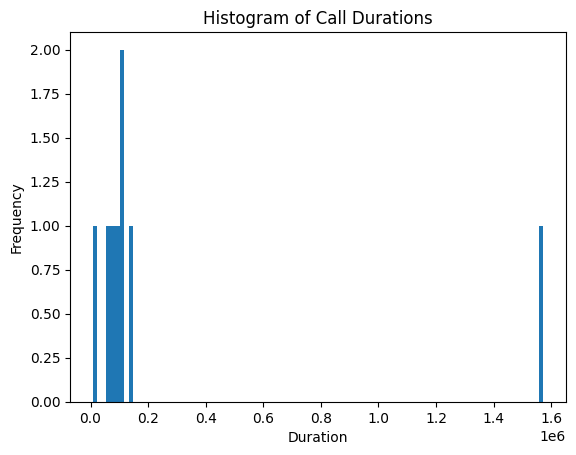

In [18]:
plot_duration_histogram(metrics, bins=100)

## Visualizing Applications

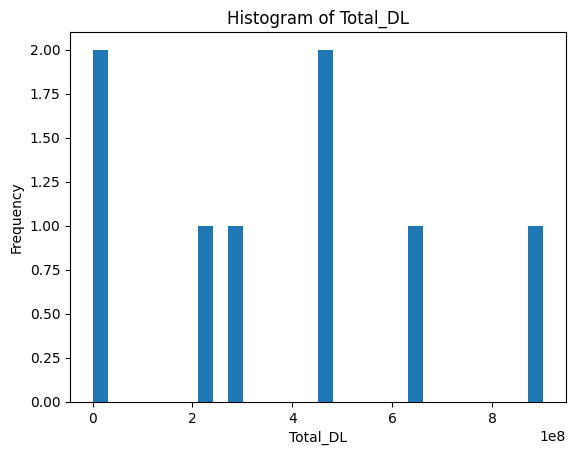

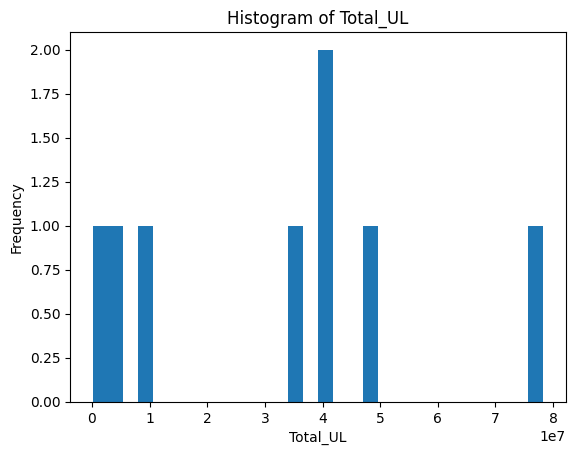

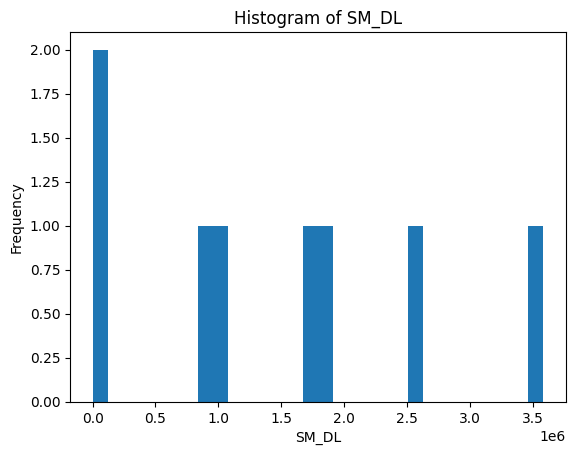

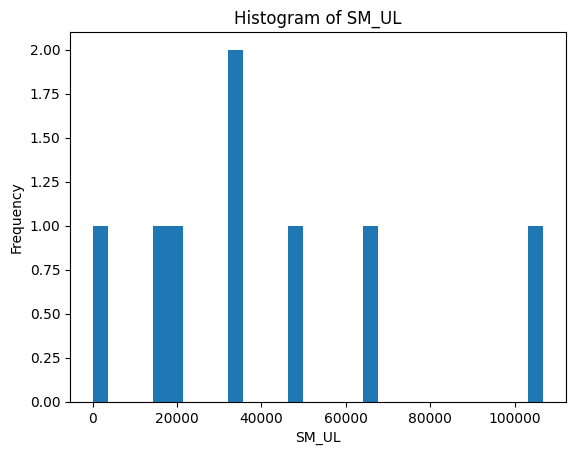

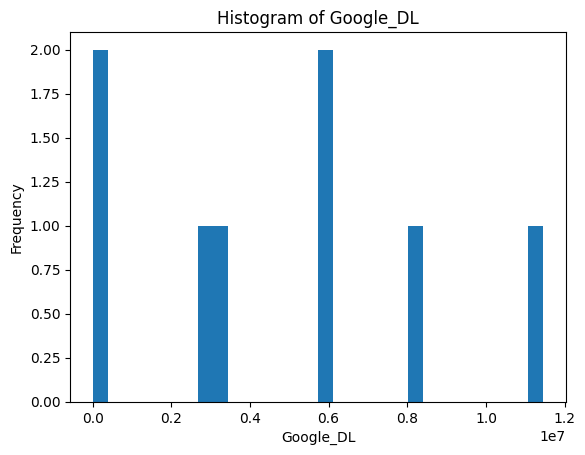

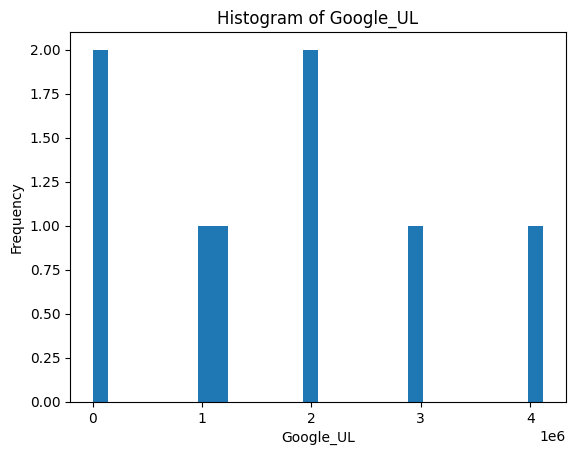

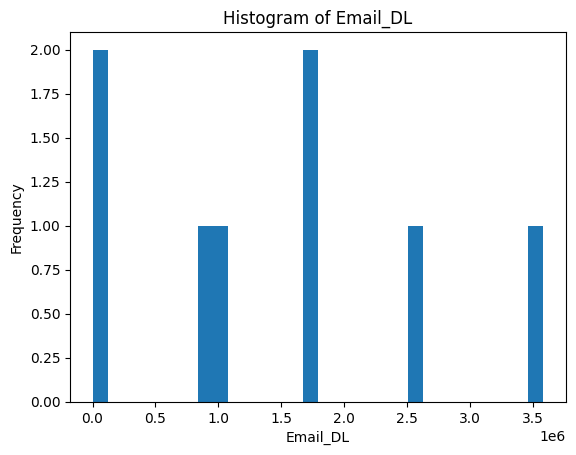

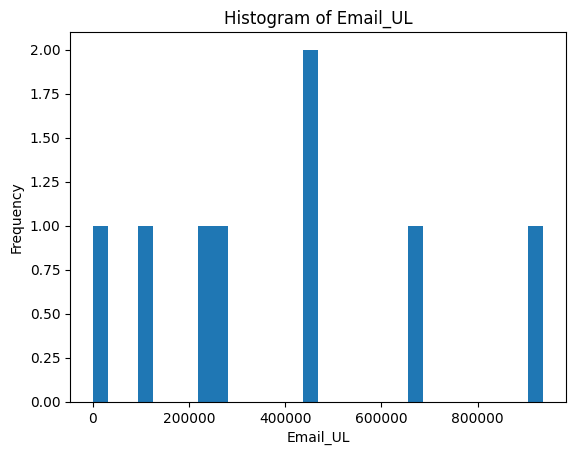

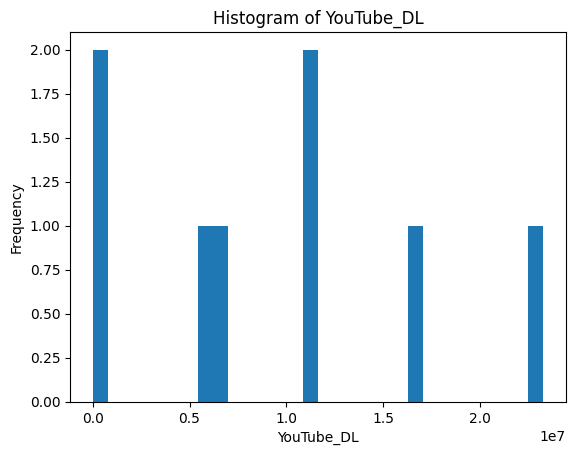

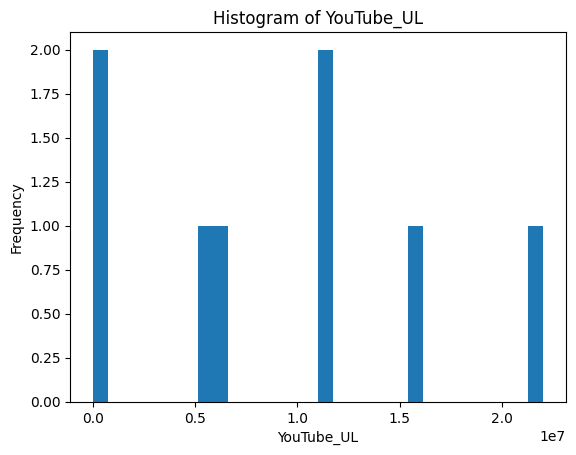

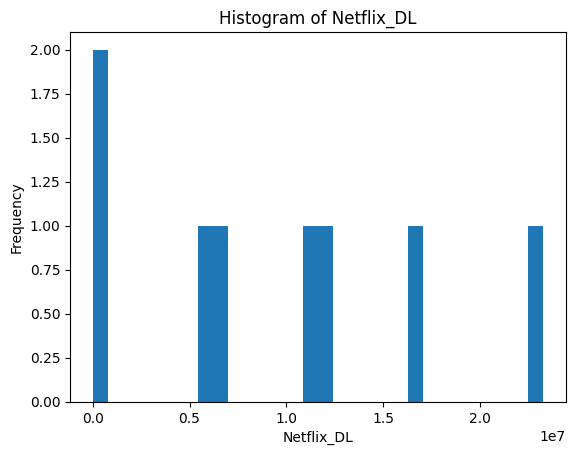

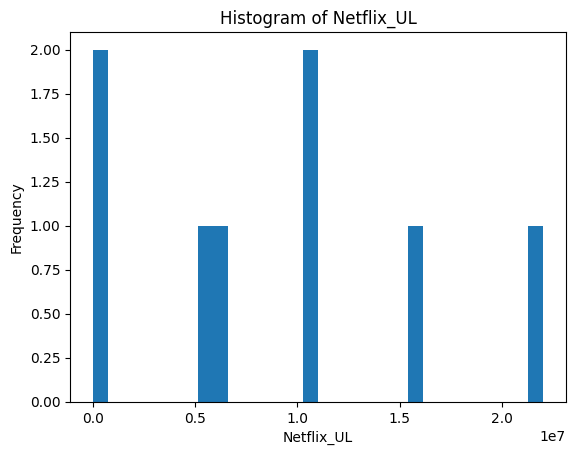

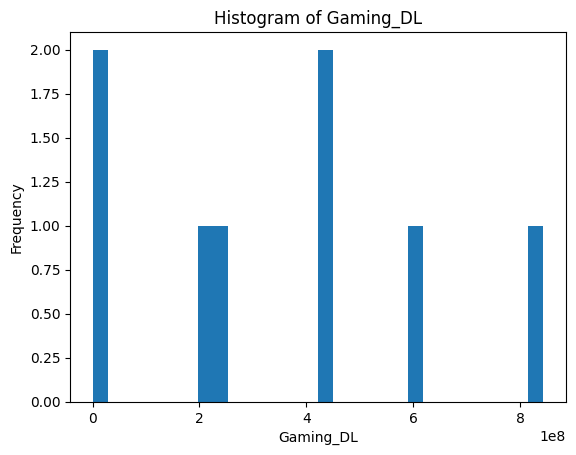

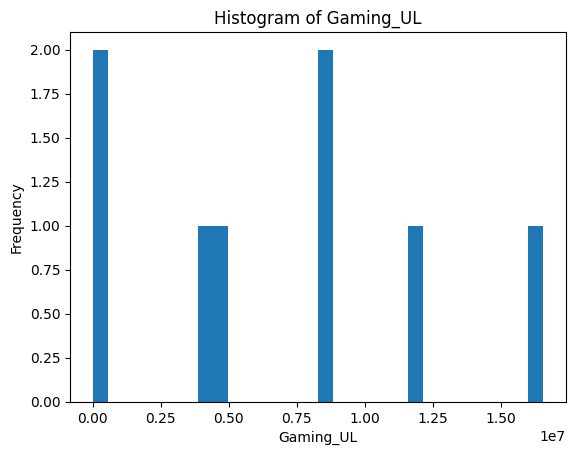

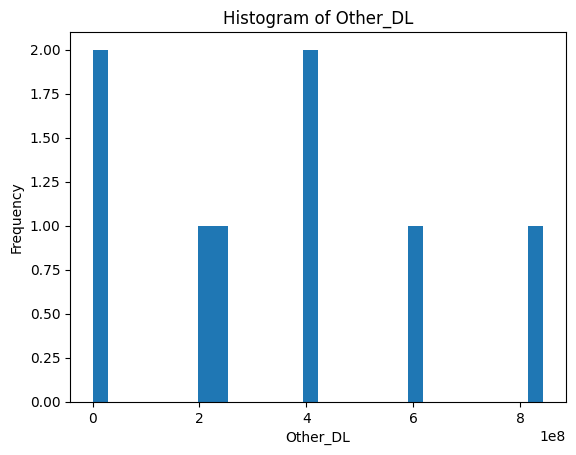

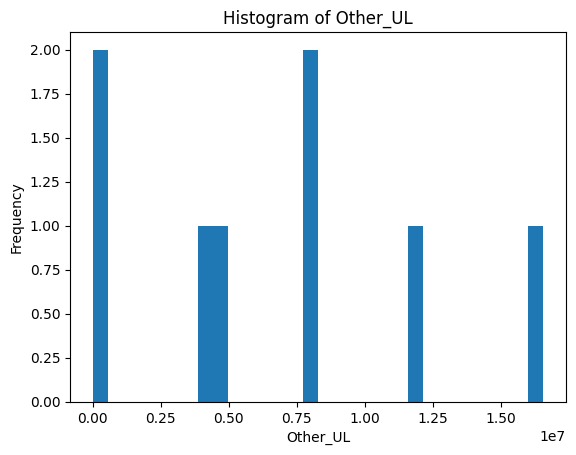

In [14]:
plot_variable_histograms(metrics)

## Bivariate Analysis Between Applications and UL + DL

In [19]:
relation = perform_bivariate_analysis(task_1_aggregated_filled)
display(relation)

Correlation between Gaming_DL and Total DL+UL data: 0.9980611195102272
Correlation between YouTube_DL and Total DL+UL data: 0.026101511634320153
Correlation between Netflix_DL and Total DL+UL data: 0.025140442151168178
Correlation between YouTube_UL and Total DL+UL data: 0.024022710600716868
Correlation between Netflix_UL and Total DL+UL data: 0.0224409398853561
Correlation between Gaming_UL and Total DL+UL data: 0.019953679817722683
Correlation between Google_DL and Total DL+UL data: 0.013422405242898403
Correlation between Google_UL and Total DL+UL data: 0.0058090876419617955
Correlation between Email_UL and Total DL+UL data: 0.003100242677391415
Correlation between Email_DL and Total DL+UL data: 0.003082723248029905
Correlation between SM_UL and Total DL+UL data: 0.0008435990316461948


None

## Total Data Per Decile

In [23]:
result = calculate_total_data_per_decile(task_1_aggregated_filled)
display(result)

,Decile_Class,Total_DL,Total_UL
0,5,4119505660147,374658675927
1,6,4860308948282,439048219416
2,7,4872529462585,438418058223
3,8,4857776218972,438509425513
4,9,4881271515511,439610834552


## Correlation Analysis on Social Media data, Google data, Email..


In [25]:
correlation_matrix = perform_correlation_analysis(task_1_aggregated_filled)
display(correlation_matrix)

,SM_DL,SM_UL,Google_DL,Google_UL,Email_DL,Email_UL,YouTube_DL,YouTube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
SM_DL,1,0,-0,0,0,-0,-0,-0,-0,0,0,0,0,0
SM_UL,0,1,0,0,0,-0,-0,-0,0,-0,0,0,-0,-0
Google_DL,-0,0,1,-0,0,0,0,0,0,-0,-0,-0,-0,-0
Google_UL,0,0,-0,1,0,-0,-0,-0,-0,-0,0,-0,0,-0
Email_DL,0,0,0,0,1,0,0,-0,-0,0,-0,-0,0,0
Email_UL,-0,-0,0,-0,0,1,0,-0,0,0,0,0,-0,-0
YouTube_DL,-0,-0,0,-0,0,0,1,0,0,0,-0,0,0,-0
YouTube_UL,-0,-0,0,-0,-0,-0,0,1,0,0,-0,-0,-0,-0
Netflix_DL,-0,0,0,-0,-0,0,0,0,1,-0,-0,0,-0,-0
Netflix_UL,0,-0,-0,-0,0,0,0,0,-0,1,-0,-0,-0,-0


# Task 2 - User Engagement Analysis

## Load Cleaned Data

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
cleaned_data = load_cleaned_dataset()

In [ ]:
display(cleaned_data)

## Agregate Metrics per Customer ID (MSISDN) 

In [ ]:
aggregated_data = aggregate_engagement_metrics(cleaned_data)
display(aggregated_data)

## Top Ten Customers

In [ ]:
top_ten_customers = get_top_ten_customers(aggregated_data)
formatted_top_ten_customers = {}
for key, value in top_ten_customers.items():
  formatted_top_ten_customers[key] = [int(x) for x in value]
display(formatted_top_ten_customers)

## Customer Grouping in Clusters (0,1,2)

In [ ]:
classified_data = engagement_classification(aggregated_data)
display(classified_data)

 ## Computing the minimum, maximum, average & total  metrics for each cluster

In [ ]:
Metric = 'Duration'
metrics_by_cluster = compute_cluster_metrics(classified_data, Metric)
display(metrics_by_cluster)

In [ ]:
top_10_users = get_top_10_engaged_users(cleaned_data, aggregated_data)
display(top_10_users)

In [ ]:
visualize_top_three_apps(top_10_users)

# Task 3 - User Experience Analytics

## Load DataFrame

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
cleaned_data = load_cleaned_dataset()

In [ ]:
display(cleaned_data)

## Aggregate per Customer ⦁	Average TCP retransmission, Average RTT, Handset type, Average throughput


In [ ]:
agg_data = aggregate_customer_data(cleaned_data)
display(agg_data)

In [ ]:
result = compute_top_bottom_frequent_values(agg_data)

# Display the results
for key, value in result.items():
    print(key + ':')
    print(value)
    print()